In [2]:
import sys
from pathlib import Path

exp_dir = str(Path("..").resolve())
if exp_dir not in sys.path:
    sys.path.insert(0, exp_dir)

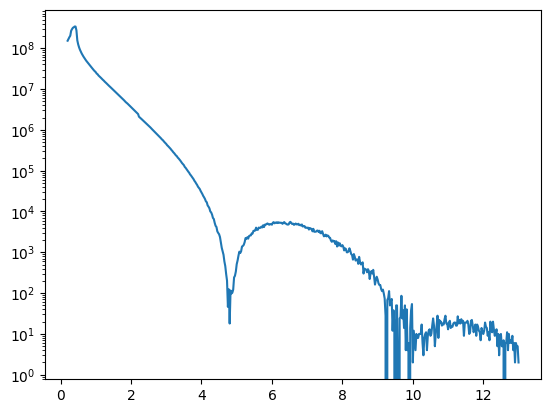

In [3]:
import matplotlib.pyplot as plt

from reflecto.io_utils import load_xrr_dat
from reflecto.physics_utils import tth2q
from reflecto.simulate.simul_genx import ParamSet, param2refl

data_file = Path(r"D:\data\dat_files\QGMOG029_02_0.2_13_final.dat")
weights_path = Path(r"D:\data\XRR_AI\mask\q1000")

tths, R_raw = load_xrr_dat(data_file)
q_raw = tth2q(tths)
plt.plot(tths, R_raw)
plt.yscale("log")

In [ ]:
from reflecto_ai_backend.fitting_engine import GenXFitter
from reflecto_ai_backend.inference import XRRInferenceEngine

inference_engine = XRRInferenceEngine(exp_dir=weights_path)

pred_f_d, pred_f_sig, pred_f_sld, pred_sio2_d, pred_sio2_sig, pred_sio2_sld = inference_engine.predict(q_raw, R_raw)


print(">>> NN Prediction:")
print(f"Thickness : {pred_f_d:.2f} Å")
print(f"Roughness : {pred_f_sig:.2f} Å")
print(f"SLD : {pred_f_sld:.3f} (10⁻⁶ Å⁻²)")
print(f"Thickness SiO2 : {pred_sio2_d:.2f} Å")
print(f"Roughness SiO2: {pred_sio2_sig:.2f} Å")
print(f"SLD SiO2: {pred_sio2_sld:.3f} (10⁻⁶ Å⁻²)")

params = [ParamSet(pred_f_d, pred_f_sig, pred_f_sld)]
sio2_param = ParamSet(pred_sio2_d, pred_sio2_sig, pred_sio2_sld)
sim_refl = param2refl(q_raw, params, sio2_param)

plt.plot(tths, R_raw / R_raw.max())
plt.plot(tths, sim_refl)
plt.yscale("log")

[Inference] Device: cuda
[Inference] Model loaded from D:\data\XRR_AI\mask\q1000\best.pt


ValueError: not enough values to unpack (expected 6, got 3)

In [ ]:
nn_initial_params = ParamSet(pred_f_d, pred_f_sig, pred_f_sld)

fitter = GenXFitter(q_raw, R_raw, nn_initial_params)

# 피팅 실행
final_results = fitter.run(verbose=True)
    # ---------------------------------------------------------

print("\n" + "-"*40)
print("FINAL ANALYSIS RESULT")
print("-"*40)
for param_name, value in final_results.items():
    print(f"{param_name:15s}: {value:.4f}")
print("="*40)


fitter.plot()

# 결과 반환
result = {
"nn_preds": (pred_f_d, pred_f_sig, pred_f_sld),
"final_params": final_results,
"fitter": fitter,
}

for key, val in result.items():
    print(f"{key}: {val}")


[GenX] Step 1: Fitting I0 (Linear)...
  -> I0 Fitted: 0.1816
[GenX] Step 2: Fitting All Params (Log)...

----------------------------------------
FINAL ANALYSIS RESULT
----------------------------------------
set_f_d        : 159.3420
set_f_sig      : 0.0000
set_f_sld      : 50.0000
set_s_d        : 5.0000
set_s_sig      : 0.0000
set_s_sld      : 10.0000


nn_preds: (np.float32(128.42432), np.float32(5.7035513), np.float32(10.069306))
final_params: {'set_f_d': 159.3420344301631, 'set_f_sig': 1.84817678141952e-07, 'set_f_sld': 49.99999999981138, 'set_s_d': 5.000000000000011, 'set_s_sig': 5.729535839959699e-07, 'set_s_sld': 10.000000000002025}
fitter: <fitting_engine.GenXFitter object at 0x000001BD6A11CCD0>


[Inference] Device: cuda
[Inference] Model loaded from D:\data\XRR_AI\one_layer\test\best.pt
#1.dat


#2.dat


#3.dat


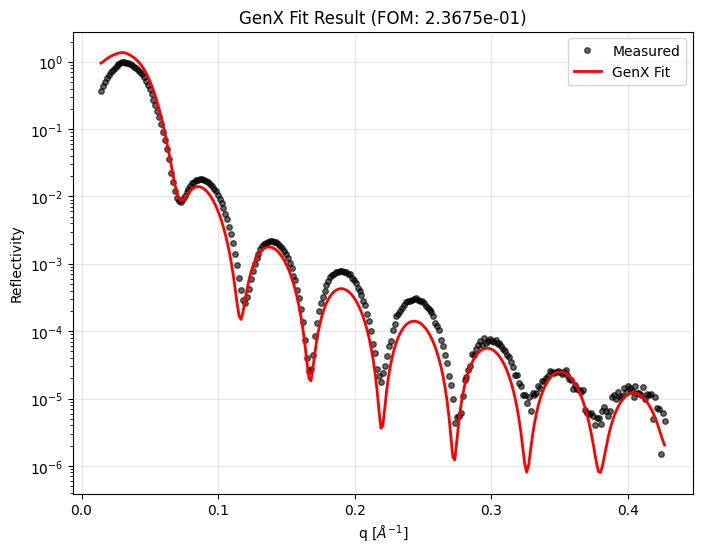

#4.dat


In [ ]:
from reflecto_ai_backend.inference_pipeline import run_xrr_analysis

data_root = Path(r"D:\03_Resources\Data\XRR_AI\XRR_data\XRR_data")
weights_path = Path(r"D:\03_Resources\Data\XRR_AI\data\one_layer\sio2_random2")
inference_engine = XRRInferenceEngine(exp_dir=weights_path)

for dat_file in data_root.glob("*.dat"):
    print(dat_file.name)
    run_xrr_analysis(dat_file, weights_path, inference_engine, verbose=False, show_plot=True)